In [1]:
#!pip install -q kaggle

In [2]:
#!mkdir %USERPROFILE%\.kaggle

In [3]:
#!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

In [4]:
# import zipfile

# with zipfile.ZipFile("toronto-emotional-speech-set-tess.zip", 'r') as zip_ref:
#     zip_ref.extractall("tess_dataset")

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [6]:
paths=[]
labels=[]

for dirname, _, filenames in os.walk('C:/Users/Dell/Speech-Emotion-Recognition-Project/kaggle/input/tess_dataset/TESS Toronto emotional speech set data'):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    label=filename.split('_')[-1]
    label=label.split('.')[0]
    labels.append(label.lower())
  if len(paths)==2800:
    break
print('Dataset is Loaded')

Dataset is Loaded


In [7]:
len(paths)

2800

In [8]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [9]:
df = pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,C:/Users/Dell/Speech-Emotion-Recognition-Proje...,angry
1,C:/Users/Dell/Speech-Emotion-Recognition-Proje...,angry
2,C:/Users/Dell/Speech-Emotion-Recognition-Proje...,angry
3,C:/Users/Dell/Speech-Emotion-Recognition-Proje...,angry
4,C:/Users/Dell/Speech-Emotion-Recognition-Proje...,angry


In [10]:
df['label'].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

In [11]:
df['label_count']=df['label'].value_counts()
df.drop('label_count',axis = 1)

,speech,label
0,C:/Users/Dell/Speech-Emotion-Recognition-Proje...,angry
1,C:/Users/Dell/Speech-Emotion-Recognition-Proje...,angry
2,C:/Users/Dell/Speech-Emotion-Recognition-Proje...,angry
3,C:/Users/Dell/Speech-Emotion-Recognition-Proje...,angry
4,C:/Users/Dell/Speech-Emotion-Recognition-Proje...,angry
...,...,...
2795,C:/Users/Dell/Speech-Emotion-Recognition-Proje...,sad
2796,C:/Users/Dell/Speech-Emotion-Recognition-Proje...,sad
2797,C:/Users/Dell/Speech-Emotion-Recognition-Proje...,sad
2798,C:/Users/Dell/Speech-Emotion-Recognition-Proje...,sad


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

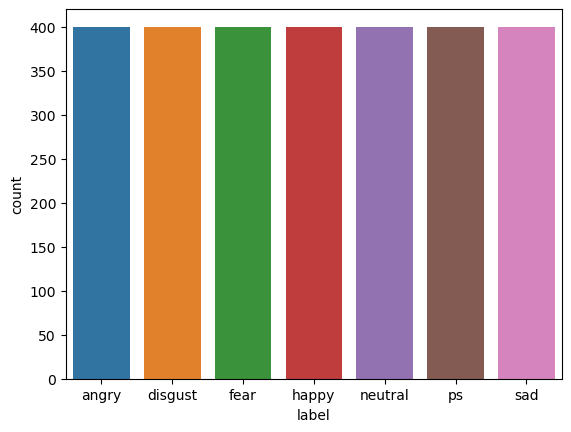

In [13]:
sns.countplot(data=df,x='label')

In [14]:
def waveplot(data, sr, emotion):
  plt.figure(figsize=(10,4))
  plt.title(emotion, size=20)
  librosa.display.waveshow(data, sr=sr)
  plt.show()

def spectogram(data, sr, emotion):
  x=librosa.stft(data)
  xdb=librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(11,4))
  plt.title(emotion, size=20)
  librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()

In [15]:
df.drop('label_count', axis=1, inplace = True)

In [16]:
print(df.head())
print(df['label'].unique())

                                              speech  label
0  C:/Users/Dell/Speech-Emotion-Recognition-Proje...  angry
1  C:/Users/Dell/Speech-Emotion-Recognition-Proje...  angry
2  C:/Users/Dell/Speech-Emotion-Recognition-Proje...  angry
3  C:/Users/Dell/Speech-Emotion-Recognition-Proje...  angry
4  C:/Users/Dell/Speech-Emotion-Recognition-Proje...  angry
['angry' 'disgust' 'fear' 'happy' 'neutral' 'ps' 'sad']


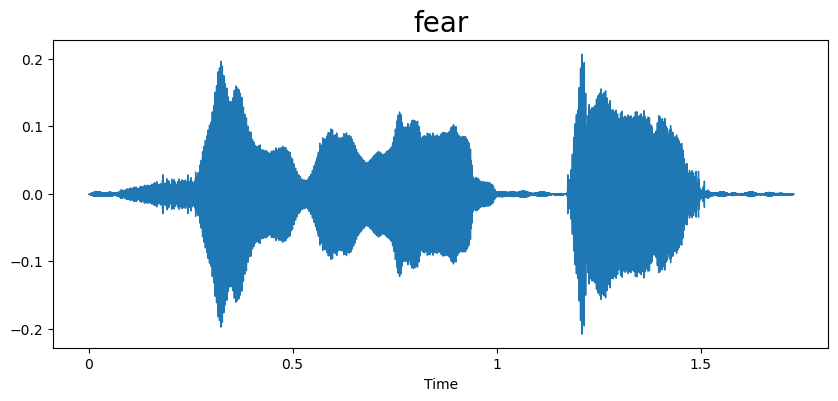

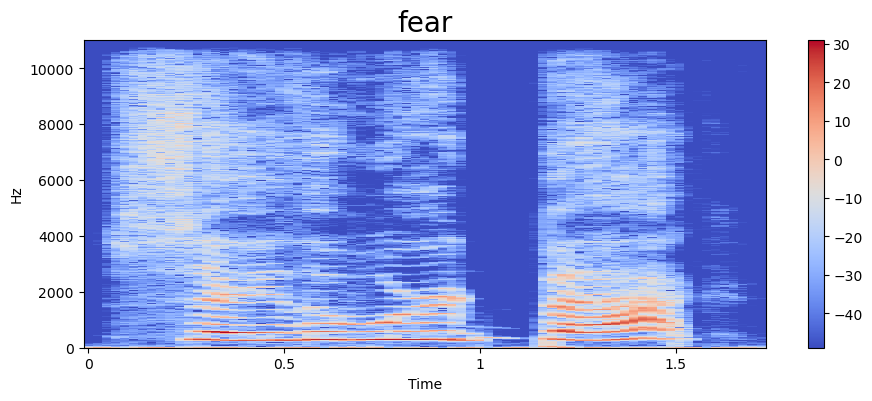

In [17]:
df['speech'].unique()
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

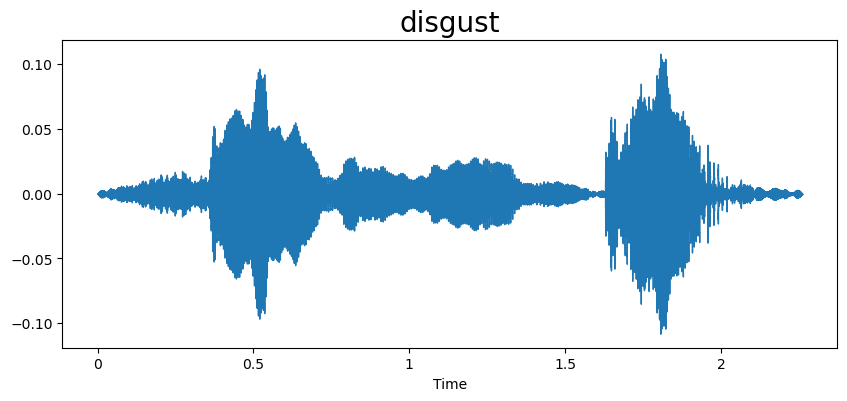

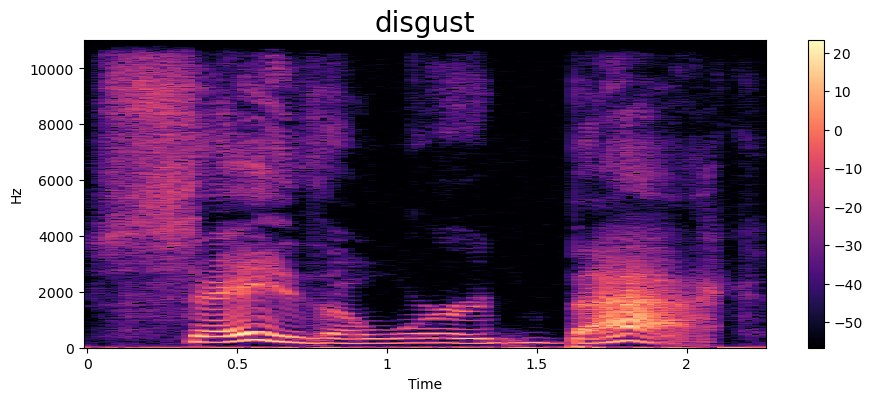

In [18]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

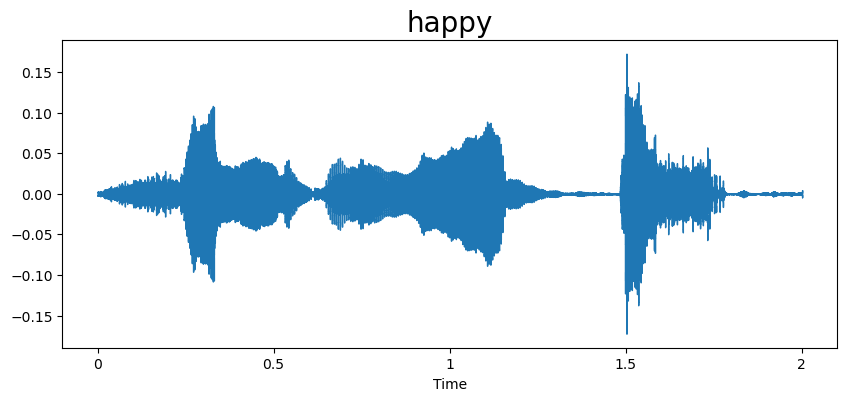

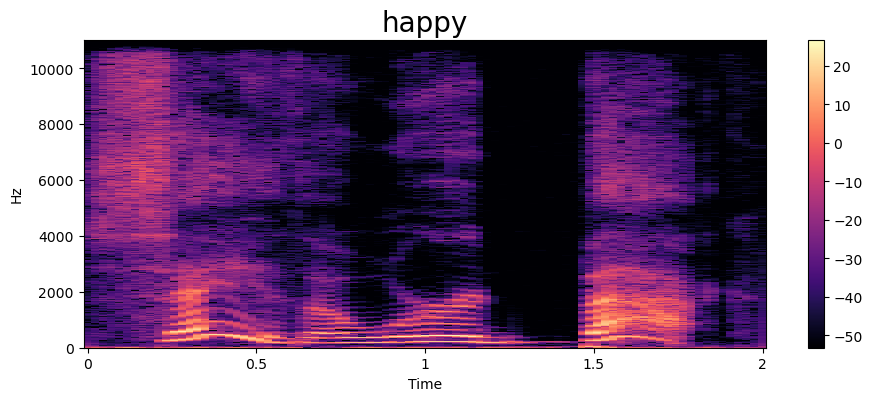

In [19]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [20]:
def extract_mfcc(filename):
  y,sr=librosa.load(filename, duration=3, offset=0.5)
  mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

In [21]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228361e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27550924e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126286e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722492e-01,  5.11131430e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996351e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915019e+00, -1.90649128e+00],
      dtype=float32)

In [22]:
X_mfcc=df['speech'].apply(lambda x: extract_mfcc(x))

In [23]:
X_mfcc
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(2800, 40)

In [24]:
X=np.expand_dims(X,-1)
X.shape

(2800, 40, 1)

In [25]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [26]:
y=y.toarray()

In [27]:
y.shape

(2800, 7)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_val,y_train,y_val=train_test_split(X,y,test_size=.2,random_state=42)

Create LSTM Model

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model=Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')

])

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()
Model: "sequential"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
#Train the model
history=model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=30, batch_size=64)

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 211ms/step - accuracy: 0.2694 - loss: 1.8377 - val_accuracy: 0.6750 - val_loss: 0.9581
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.5566 - loss: 1.1031 - val_accuracy: 0.7732 - val_loss: 0.5933
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - accuracy: 0.7166 - loss: 0.7359 - val_accuracy: 0.8821 - val_loss: 0.3610
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - accuracy: 0.8450 - loss: 0.4527 - val_accuracy: 0.9250 - val_loss: 0.2227
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - accuracy: 0.9028 - loss: 0.3403 - val_accuracy: 0.9393 - val_loss: 0.1973
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.9225 - loss: 0.2737 - val_accuracy: 0.9786 - val_loss: 0.0962
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - accuracy: 0.9488 - loss: 0.1852 - val_accuracy: 0.9839 - val_loss: 0.0586
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.9396 - loss: 0.2250 - val_accuracy: 0

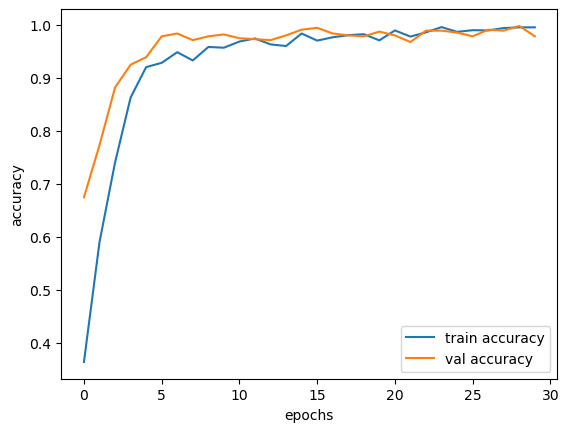

In [31]:
epochs=list(range(30))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

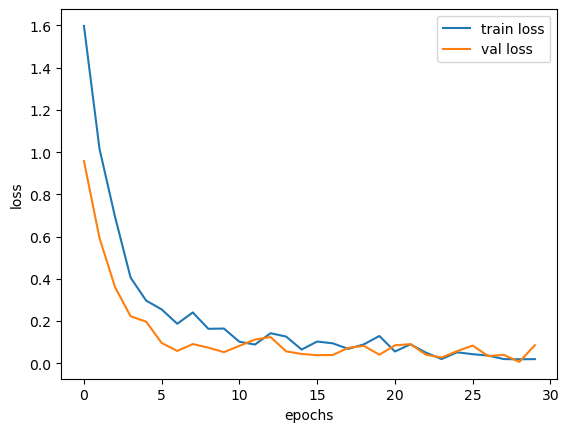

In [32]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,label='train loss')
plt.plot(epochs,val_loss,label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [33]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step


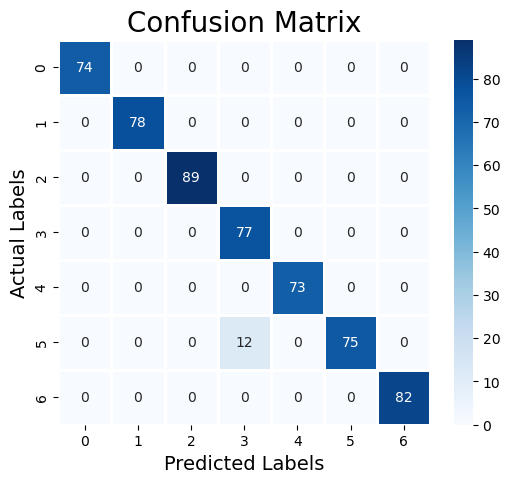

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)
plt.figure(figsize = (6, 5))
sns.heatmap(conf_matrix, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [35]:
#Print the classification report
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprise', 'sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00        74
     disgust       1.00      1.00      1.00        78
        fear       1.00      1.00      1.00        89
       happy       0.87      1.00      0.93        77
     neutral       1.00      1.00      1.00        73
    surprise       1.00      0.86      0.93        87
         sad       1.00      1.00      1.00        82

    accuracy                           0.98       560
   macro avg       0.98      0.98      0.98       560
weighted avg       0.98      0.98      0.98       560

